<a href="https://colab.research.google.com/github/kaustubhydv/Steepest-Descent-Newton-and-Quasi-Newton-Optimisation/blob/main/SD_NM_QN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
from numpy.linalg import inv,det
import matplotlib.pyplot as plt
import copy
import matplotlib.pyplot as plt


epsilon = 10**-6
NUM_ITER = 15000
x_history_NM = []
x_history_SD = []
x_history_QN = []

rho = 0.8
c = 0.1
alpha0 = 5

In [ ]:
def norm(vec):
  return (vec[0]**2 + vec[1]**2)**0.5

def del_f_delxj(f,j,x_star,h=0.001):
  ej = np.zeros(x_star.shape[0])
  ej[j] = 1
  return (f(x_star+h*ej) - f(x_star-h*ej))/(2*h)

def gradient(f,x_input):
  x_star = np.asarray(x_input)
  return np.asarray([del_f_delxj(f,j,x_star) for j in range(x_star.shape[0])])


def del2f_delxi2(f,x_star,i,delxi=0.001):
  x_starp = np.copy(x_star)
  x_starp[i] = x_starp[i] + delxi
  x_starm = np.copy(x_star)
  x_starm[i] = x_starm[i] - delxi
  return (f(x_starp)-2*f(x_star)+f(x_starm))/(delxi**2)
  



def del2f_delxixj(f,x_star,i,j,delxi=0.001,delxj=0.001):
  x_starA = np.copy(x_star)
  x_starA[i] += delxi
  x_starA[j] += delxj 
  
  x_starB = np.copy(x_star)
  x_starB[i] -= delxi
  x_starB[j] -= delxj 
  
  x_starC = np.copy(x_star)
  x_starC[i] -= delxi
  x_starC[j] += delxj 
  
  x_starD = np.copy(x_star)
  x_starD[i] += delxi
  x_starD[j] -= delxj 

  A = f(x_starA)
  B = f(x_starB)
  C = f(x_starC)
  D = f(x_starD)

  return (A+B-C-D)/(4*delxi*delxj)



def hessian(f,x_input):
  x_star = np.asarray(x_input)
  n = x_star.shape[0]

  g = np.zeros((n,n))

  for i in range(n):
    for j in range(n):
      if i==j:
        g[i][j] = del2f_delxi2(f,x_star,i,delxi=0.001)
      else:
        g[i][j] = del2f_delxixj(f,x_star,i,j,delxi=0.001,delxj=0.001)
  return g


def getC(xk,xk1,C):
  del_x = np.matrix(xk1-xk).T
  y = np.matrix(gradient(func,xk1) - np.asarray(gradient(func,xk))).T

  I = np.identity(2)

  hes_inv = (I - (1/det(y.T*del_x))*del_x*y.T) * C * (I - (1/det(y.T*del_x))*y*del_x.T) + (1/(det(y.T*del_x))*del_x*del_x.T)

  return hes_inv 


def getAlpha_SD(xk,func,alpha0,rho,c):
  alpha = alpha0
  g = np.asarray(gradient(func,xk))
  pk = -np.asarray(gradient(func,xk))
  while (func(xk+ alpha*pk)) > func(xk) + alpha*c*np.dot(g,pk):
    alpha = rho*alpha
  return alpha

def getAlpha_NM(xk,func,alpha0,rho,c):
  alpha = alpha0
  g = np.asarray(gradient(func,xk))
  h = np.asarray(hessian(func,xk))
  h_1 = inv(h)
  pk = -h_1.dot(g)
  while (func(xk+ alpha*pk)) > func(xk) + alpha*c*np.dot(g,pk):
    alpha = rho*alpha
  return alpha

def getAlpha_QN(xk,C,func,alpha0,rho,c):
  alpha = alpha0
  g = np.asarray(gradient(func,xk))
  pk = -C.dot(np.asarray(gradient(func,xk)))
  while (func(xk+ alpha*pk)) > func(xk) + alpha*c*np.dot(g,pk):
    alpha = rho*alpha
  return alpha

[1.35009315 1.35009315]


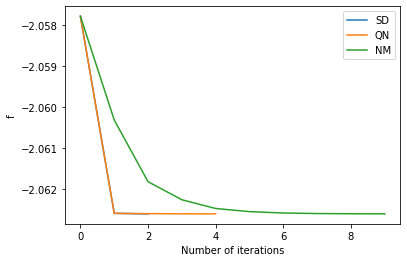

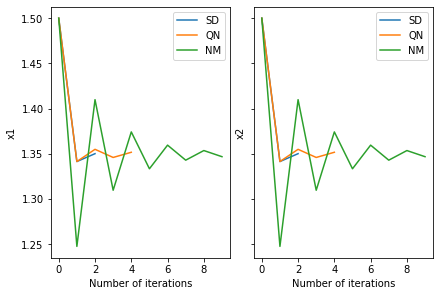

In [ ]:
def func(x_input):
    """
    --------------------------------------------------------
    Write your logic to evaluate the function value. 

    Input parameters:
        x: input column vector (a numpy array of n dimension)

    Returns:
        y : Value of the function given in the problem at x.
        
    --------------------------------------------------------
    """
    
    # Start your code here
    
    #y = x_input[0]**2 + x_input[1]**2 + (0.5*x_input[0] + x_input[1])**2 + (0.5*x_input[0] + x_input[1])**4 
    #y =  (x_input[0]-1)**2 + (x_input[1]-1)**2 - x_input[0]*x_input[1]
    #y = (x_input[0] + 2*x_input[1] -7)**2 + (2*x_input[0] + x_input[1]-5)**2
    y = -0.0001*(np.absolute(np.sin(x_input[0])*np.sin(x_input[1])*np.exp(np.absolute(100-((x_input[0]**2 + x_input[1]**2)**0.5)/np.pi))))**0.1
    # End your code here
    
    return y
        
        
def steepest_descent(func, x_initial):
    """
    -----------------------------------------------------------------------------------------------------------------------------
    Write your logic for steepest descent using in-exact line search. 

    Input parameters:  
        func : input function to be evaluated
        x_initial: initial value of x, a column vector (numpy array)

    Returns:
        x_output : converged x value, a column vector (numpy array)
        f_output : value of f at x_output
        grad_output : value of gradient at x_output, a column vector(numpy array)
    -----------------------------------------------------------------------------------------------------------------------------
    """
    x_history = []
    x_initial = np.asarray(x_initial)
    x_history.append(x_initial)
    # Start your code here
    for i in range(NUM_ITER):
      xk = x_history[-1]
      x_k1 = xk - getAlpha_SD(xk,func,alpha0,rho,c) * gradient(func,xk)
      x_history.append(x_k1)

      if norm(gradient(func,x_k1))**2 <= epsilon:
        break
    print(x_history[-1])
    global x_history_SD
    x_history_SD = copy.copy(x_history)
    #print(x_history)
    x_output = x_history[-1]
    f_output = func(x_output)
    grad_output = np.asarray(gradient(func,x_output))
    
    if len(x_history) == NUM_ITER:
      print("Maximum iterations reached but convergence did not happen")
    
    
    # End your code here
    del x_history
    return x_output, f_output, grad_output
    


def newton_method(func, x_initial):
    """
    -----------------------------------------------------------------------------------------------------------------------------
    Write your logic for newton method using in-exact line search. 

    Input parameters:  
        func : input function to be evaluated
        x_initial: initial value of x, a column vector (numpy array)

    Returns:
        x_output : converged x value, a column vector (numpy array)
        f_output : value of f at x_output
        grad_output : value of gradient at x_output, a column vector (numpy array)
    -----------------------------------------------------------------------------------------------------------------------------
    """

    x_history = []
    x_initial = np.asarray(x_initial)
    x_history.append(x_initial)
    # Start your code here
    for i in range(NUM_ITER):
      xk = x_history[-1]
      g = np.asarray(gradient(func,xk))
      h = np.asarray(hessian(func,xk))
      h_1 = inv(h)
      x_k1 = xk - getAlpha_NM(xk,func,alpha0,rho,c) * (h_1.dot(g))
      x_history.append(x_k1)

      if norm(gradient(func,x_k1))**2 <= epsilon:
        break

    global x_history_NM
    x_history_NM = copy.copy(x_history)
    #print(x_history)

    x_output = x_history[-1]
    f_output = func(x_output)
    grad_output = np.asarray(gradient(func,x_output))
  
    if len(x_history) == NUM_ITER:
      print("Maximum iterations reached but convergence did not happen")
    # End your code here
    del x_history
    return x_output, f_output, grad_output



def quasi_newton_method(func, x_initial):
    """
    -----------------------------------------------------------------------------------------------------------------------------
    Write your logic for quasi-newton method with in-exact line search. 

    Input parameters:  
        func : input function to be evaluated
        x_initial: initial value of x, a column vector (numpy array)

    Returns:
        x_output : converged x value, a column vector (numpy array)
        f_output : value of f at x_output
        grad_output : value of gradient at x_output, a column vector (numpy array)
    -----------------------------------------------------------------------------------------------------------------------------
    """
    
    # Start your code here
    x_history = []
    x_initial = np.asarray(x_initial)
    x_history.append(x_initial)
   
    C = np.asarray(np.identity(2))
    for i in range(NUM_ITER):
      if i == 0 :
        xk = x_history[-1]
        g = np.asarray(gradient(func,xk))
        x_k1 = xk - getAlpha_QN(xk,C,func,alpha0,rho,c) * np.asarray(C.dot(g))
        x_history.append(x_k1)
      
      else:

        C = np.asarray(getC(x_history[-2],x_history[-1],C))
        xk = x_history[-1]
        g = np.asarray(gradient(func,xk))
        x_k1 = xk - getAlpha_QN(xk,C,func,alpha0,rho,c) * np.asarray(C.dot(g))
        x_history.append(x_k1)


      if norm(gradient(func,x_k1))**2 <= epsilon:
        break

    global x_history_QN
    x_history_QN = copy.copy(x_history)
    #print(x_history)

    x_output = x_history[-1]
    f_output = func(x_output)
    grad_output = np.asarray(gradient(func,x_output))

    if len(x_history) == NUM_ITER:
      print("Maximum iterations reached but convergence did not happen")
    # End your code here
    del x_history
    return x_output, f_output, grad_output



def iterative_methods(func, x_initial):
    """
     A function to call your steepest descent, newton method and quasi-newton method.
    """
    x_SD, f_SD, grad_SD = steepest_descent(func, x_initial)
    x_NM, f_NM, grad_NM = newton_method(func, x_initial)
    x_QN, f_QN, grad_QN = quasi_newton_method(func, x_initial)

    return x_SD, f_SD, grad_SD, x_NM, f_NM, grad_NM, x_QN, f_QN, grad_QN 
    
    

def plot_x():
  
  x1_SD = [x[0] for x in x_history_SD]
  x1_QN = [x[0] for x in x_history_QN]
  x1_NM = [x[0] for x in x_history_NM]
  x2_SD = [x[1] for x in x_history_SD]
  x2_QN = [x[1] for x in x_history_QN]
  x2_NM = [x[1] for x in x_history_NM]





  c = np.arange(0, NUM_ITER+1, 1)
  fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, sharey=True)
  
  ax1.set_xlabel('Number of iterations')
  ax1.set_ylabel('x1')
  ax2.set_xlabel('Number of iterations')
  ax2.set_ylabel('x2')



  ax1.plot(c[:len(x1_SD)],x1_SD,label='SD')
  ax1.plot(c[:len(x1_QN)],x1_QN,label='QN')
  ax1.plot(c[:len(x1_NM)],x1_NM,label='NM')
  

  
  ax2.plot(c[:len(x2_SD)],x2_SD,label='SD')
  ax2.plot(c[:len(x2_QN)],x2_QN,label='QN')
  ax2.plot(c[:len(x2_NM)],x2_NM,label='NM')

  ax1.legend()
  ax2.legend()

  plt.show()    



def plot_f():
  f_SD = [func(x) for x in x_history_SD]
  f_QN = [func(x) for x in x_history_QN]
  f_NM = [func(x) for x in x_history_NM]

  c = np.arange(0, NUM_ITER+1, 1)
  plt.plot(c[:len(f_SD)],f_SD,label='SD')
  plt.plot(c[:len(f_QN)],f_QN,label='QN')
  plt.plot(c[:len(f_NM)],f_NM,label='NM')
  plt.xlabel('Number of iterations')
  plt.ylabel('f')
  plt.legend()

"""--------------- Main code: Below code is used to test the correctness of your code ---------------

    func : function to evaluate the function value. 
    x_initial: initial value of x, a column vector, numpy array
    
"""

# Define x_initial here

x_initial = [1.5,1.5]
x_SD, f_SD, grad_SD, x_NM, f_NM, grad_NM, x_QN, f_QN, grad_QN = iterative_methods(func, x_initial)
plot_f()
plot_x()